# Import Relevant Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


# Load The DataSet

In [3]:
batch_size = 32
img_height = 512
img_width = 512
data_dir = "C:/Users/admin/Downloads/Model/Dataset/Tomato"
EPOCHS=10
CHANNELS=3

In [4]:
data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1963 files belonging to 2 classes.


In [5]:
class_names=data.class_names
class_names

['fresh_tomato', 'stale_tomato']

# Training th Data 

### 80% Data For Training
### 20% Data For Testing(10%:- Validation, 10%:- Test)


In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
        
    train_data_size=int(train_split*ds_size)
    val_data_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_data_size)
    val_ds=ds.skip(train_data_size).take(val_data_size)
    test_ds=ds.skip(train_data_size).skip(val_data_size)
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(data)

In [8]:
len(train_ds)

49

In [9]:
len(val_ds)

6

In [10]:
len(test_ds)

7

In [11]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [12]:
resize_and_rescaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_width, img_height),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# CNN

In [14]:
Input_Shape=(batch_size, img_width, img_height, CHANNELS)
n_classes=2

In [15]:
CNN_model=models.Sequential([
    resize_and_rescaling,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=Input_Shape), #COnvoultion Layers
    layers.MaxPooling2D((2,2)), #Pooling Layers
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    #Above Mutilpe layers Of Convolution and Pooling Layer
    #it is totally depend on us How much Layers we want
    
    #Now Flattening these layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

CNN_model.build(input_shape=Input_Shape)

In [16]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 512, 512, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 512, 512, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 510, 510, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 255, 255, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 253, 253, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 126, 126, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 124, 124, 64)       

In [17]:
CNN_model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
  
)
  

## Fitting the Model in training Data

In [18]:
history=CNN_model.fit(
   train_ds,
   batch_size=batch_size,
   validation_data=val_ds,
   verbose=1,
   epochs=EPOCHS
)

Epoch 1/10
49/49 [==============================] - 803s 16s/step - loss: 0.6910 - accuracy: 0.5184 - val_loss: 0.6950 - val_accuracy: 0.4795
Epoch 2/10
49/49 [==============================] - 764s 16s/step - loss: 0.6939 - accuracy: 0.5003 - val_loss: 0.6914 - val_accuracy: 0.5205
Epoch 3/10
49/49 [==============================] - 845s 17s/step - loss: 0.6757 - accuracy: 0.5740 - val_loss: 0.5374 - val_accuracy: 0.6959
Epoch 4/10
49/49 [==============================] - 712s 15s/step - loss: 0.6317 - accuracy: 0.6257 - val_loss: 0.5692 - val_accuracy: 0.6199
Epoch 5/10
49/49 [==============================] - 548s 11s/step - loss: 0.5635 - accuracy: 0.6839 - val_loss: 0.4662 - val_accuracy: 0.7895
Epoch 6/10
49/49 [==============================] - 568s 12s/step - loss: 0.5005 - accuracy: 0.7343 - val_loss: 0.4538 - val_accuracy: 0.7602
Epoch 7/10
49/49 [==============================] - 564s 12s/step - loss: 0.4599 - accuracy: 0.7809 - val_loss: 0.4140 - val_accuracy: 0.8012
Epoch 

# Predictions of Model

First image to Predict
Actual label(photo): stale_tomato
predicated label(photo): stale_tomato


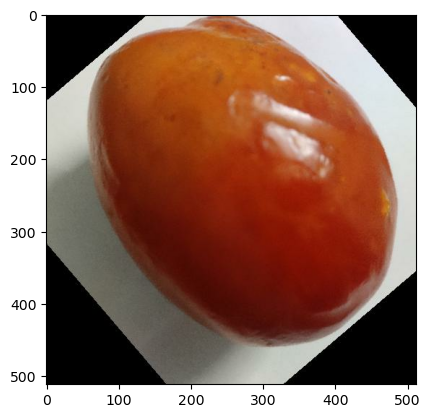

In [31]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[5].numpy().astype('uint8')
    first_label=labels_batch[5].numpy()
    
    print("First image to Predict")  
    plt.imshow(first_image)
    print("Actual label(photo):", class_names[first_label])
    
    batch_prediction = CNN_model.predict(image_batch)
    print("predicated label(photo):", class_names[np.argmax(batch_prediction[5])])

In [21]:
scores = CNN_model.evaluate(test_ds)

7/7 [==============================] - 14s 2s/step - loss: 0.2368 - accuracy: 0.8750
